<a href="https://colab.research.google.com/github/sallumandya1995/datascience/blob/master/assemblyai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi
 

Load the pipeline

 **Cohere one shot lerning capbility**
 
 
Using power of Cohere's command model to write a detailed caption of an image describing the interior design of living room and letting stable diffusion do the remaining magic
 

In [ ]:
#@title init libraries for GPu
!pip install -qq cohere
!pip install -qq gradio
!pip install -qq accelerate
!pip install -qq diffusers==0.8.0   ftfy
!pip install -qq "ipywidgets>=7,<8"
 
!pip install git+https://github.com/huggingface/transformers
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline
  
import random
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline

import requests
import os
 
from IPython.display import Image, display
import cohere

from huggingface_hub import notebook_login
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline
import inspect
import warnings
from typing import List, Optional, Union
 

 

!python -c "from huggingface_hub.hf_api import HfFolder; HfFolder.save_token('xxxxxxxxxxxxxxxx')" #pass huggingface token as arguement

 
co = cohere.Client('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')   #use your cohere api inside

os.system("gdown https://drive.google.com/uc?id=1mT9ewx86PSrc43b-ax47l1E2UzR7Ln4j -O RealESRGAN_x8.pth")
device = "cuda"
model_path = "prompthero/midjourney-v4-diffusion"
model_path="stabilityai/stable-diffusion-2"

model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
#     revision="fp16",  # comment for prompt hero version
    torch_dtype=torch.float16
    ,use_auth_token=True
)
pipe = pipe.to(device)


#upscalers

!git clone https://huggingface.co/spaces/Xhaheen/Face-Real-ESRGAN
!pip install -q gdown gradio
!cp -r Face-Real-ESRGAN/. .

# %cd Face-Real-ESRGAN

In [ ]:
#@title using cohere  and gpus
import csv
from PIL import Image


import re
import datetime


 
import random
import torch
from PIL import Image
import numpy as np
from realesrgan import RealESRGAN
import os
import gradio as gr
import os

import matplotlib.pyplot as plt
!wget https://huggingface.co/spaces/Xhaheen/Baith-al-suroor/resolve/main/1.png
!wget https://huggingface.co/spaces/Xhaheen/Face-Real-ESRGAN/resolve/main/RealESRGAN_x8.pth 
if not os.path.exists("RealESRGAN_x8.pth"):
  !wget https://huggingface.co/spaces/Xhaheen/Face-Real-ESRGAN/resolve/main/RealESRGAN_x8.pth

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


        
current_time = datetime.datetime.now()
def generate_caption_keywords(prompt, model='command-xlarge-20221108', max_tokens=200, temperature=random.uniform(0.1, 2), k=0, p=0.75, frequency_penalty=0, presence_penalty=0, stop_sequences=[]):
    
    response = co.generate(
      model=model,
      prompt=prompt,
      max_tokens=max_tokens,
      temperature=temperature,
      k=k,
      p=p,
      frequency_penalty=frequency_penalty,
      presence_penalty=presence_penalty,
      stop_sequences=stop_sequences,
      return_likelihoods='NONE')

    def highlight_keywords(text):
        keywords = []
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text) # remove punctuation
        text = re.sub(r'\b(the|and|of)\b', '', text) # remove stop words
        words = text.split()
        for word in words:
            if word not in keywords:
                keywords.append(word)
        return keywords

    caption = response.generations[0].text
    keywords = highlight_keywords(caption)
    keywords_string = ', '.join(keywords)

    return caption, keywords_string


def img2img( path ,is_HD,design,x_prompt,alt_prompt,strength,guidance_scale,steps):
  current_time = datetime.datetime.now()
  prompt = f'write a detailed caption of an image describing the  {design}'
  
  try:
        caption, keywords = generate_caption_keywords(prompt)
        prompt = keywords
  except:
    
    prompt = design
    

  if x_prompt == True:
    
    prompt=alt_prompt
    print(alt_prompt ,strength,7.9,current_time)
     
 
  generator = torch.Generator(device=device).manual_seed(1024) 
  
 
    
  init_img =Image.open(path)
#   init_img.save(f"original_{prompts[0]}_strength{strength}_guidance_{guidance_scale}.jpeg")

  with autocast("cuda"):
        
      
      image2 = pipe(prompt=prompt , init_image=init_img, strength=strength,num_inference_steps=steps, guidance_scale=guidance_scale, generator=generator).images[0]
      
 #remove if condition in above line if it does not fits
      if is_HD == True:


        model8 = RealESRGAN(device, scale=8)

         
        model8.load_weights('RealESRGAN_x8.pth')
        image2 = model8.predict(image2.convert('RGB'))
        
 
      image2.save("image2.jpeg")
      image2.save(f"new_{current_time}{design}_strength{strength}_guidance_{guidance_scale}.jpeg")
#       print(design,prompt ,strength,7.9,current_time)
      # Import the pyplot module from Matplotlib

 

      # Display the image using the imshow function
      plt.imshow(image2)

      # Show the plot on the screen
      plt.show()

      print(f"new_{current_time}{design}_strength{strength}_guidance_{guidance_scale}.jpeg")
      current_image=f"new_{current_time}{design}_strength{strength}_guidance_{guidance_scale}.jpeg"
      


      # Download the file # comment for kaggle
      from google.colab import files
      files.download(f"new_{current_time}{design}_strength{strength}_guidance_{guidance_scale}.jpeg")
 
      
  def append_csv(filename, row):
      with open(filename, "a") as f:
          writer = csv.writer(f)
          writer.writerow(row)
# records the data bases to store inputs and outputs for future reference
  append_csv("database.csv", [current_time,strength,guidance_scale,f"new_{prompt}_strength{strength}_guidance_{guidance_scale}.jpeg"])

  
  return image2

 

In [ ]:
import os
import cohere
import random
# co = cohere.Client(cohere_key)

import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation
from PIL import Image
import re
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
os.environ['STABILITY_KEY'] = 'sk- ' # enter api key from dreamstudio http://dreamstudio.ai/ 

STABILITY_HOST = os.environ["STABILITY_HOST"]
STABILITY_KEY = os.environ["STABILITY_KEY"]
co = cohere.Client(' ')# #enter api key of cohere
# cohere_key = os.environ["cohere_key"]
# co = cohere.Client(cohere_key)
 


def generate_caption_keywords(promptz, model='command-xlarge-20221108', max_tokens=200, temperature=random.uniform(0.1, 2), k=0, p=0.75, frequency_penalty=0, presence_penalty=0, stop_sequences=[]):
 
    response = co.generate(
      model='command-xlarge-20221108',
      prompt=f'write prompts for interior designs which does not exist\n\nexterior design of house = Peaceful wooden mansion, unreal engine 5 tech demo, zillow interior, living room, cozy, Frank Lloyd Wright\n##\nexterior design of house = Double story suburban house,it is raining, night time , peaceful atmosphere, moody lighting , digital art , highly detailed , high contrast, beautiful lighting, award winning , trending on art station, photorealistic, 8k \n##\nexterior design of house =cute chubby house, 3 d render, minimalistic, octane, 1 0 0 mm, depth of field, diorama, blue background \n##\nexterior design of house =elevation of a modern luxurious villa in a rich urban area, photorealist, 4 k \n##\ninterior design  of  of kitchen room = Full modern kitchen, purple furniture, star wallpaper, digital Painting, ultradetailed, artstation, oil Painting, ultradetailed, artstation\n##\ninterior design of  of bathroom =bathroom design archi-viz biopunck grean schem, by Stanley Artgerm Lau, WLOP, Rossdraws, James Jean, Andrei Riabovitchevy, Marc Simonetti, and Sakimichan, trending on artstation\n##\ninterior design  of    bathroom = modern bathroom, gloomy and foggy atmosphere, octane render, artstation trending, horror scene, highly detailed \n##\n{promptz} =',
      max_tokens=25,
      temperature=0.6,
      k=0,
      p=1,
      frequency_penalty=0,
      presence_penalty=0,
      stop_sequences=["##"],
      return_likelihoods='NONE')
# print('Prediction: {}'.format(response.generations[0].text))
    def highlight_keywords(text):
        keywords = []
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text) # remove punctuation
        text = re.sub(r'\b(the|and|of)\b', '', text) # remove stop words
        words = text.split()
        for word in words:
            if word not in keywords:
                keywords.append(word)
        return keywords

    caption = response.generations[0].text
    keywords = highlight_keywords(caption)
    keywords_string = ', '.join(keywords)

    return caption, keywords_string


 
def img2img(  design,cfg_scale,steps):
  try:
    caption, keywords = generate_caption_keywords(design)
    prompt = keywords
  except:
    prompt = design

 

  # Set up our connection to the API.
  stability_api = client.StabilityInference(
      key=os.environ['STABILITY_KEY'], # API Key reference.
      verbose=True, # Print debug messages.
      engine="stable-diffusion-v1-5", # Set the engine to use for generation. 
      # Available engines: stable-diffusion-v1 stable-diffusion-v1-5 stable-diffusion-512-v2-0  stable-inpainting-v1-0 stable-inpainting-512-v2-0
  )

  # Set up our initial generation parameters.
  answers = stability_api.generate(
      prompt=design+prompt,
      seed=random.seed(), # If a seed is provided, the resulting generated image will be deterministic.
                      # What this means is that as long as all generation parameters remain the same, you can always recall the same image simply by generating it again.
                      # Note: This isn't quite the case for Clip Guided generations, which we'll tackle in a future example notebook.
      steps=steps, # Amount of inference steps performed on image generation. Defaults to 30. 
      cfg_scale=cfg_scale, # Influences how strongly your generation is guided to match your prompt.
                    # Setting this value higher increases the strength in which it tries to match your prompt.
                    # Defaults to 7.0 if not specified.
      width=512, # Generation width, defaults to 512 if not included.
      height=512, # Generation height, defaults to 512 if not included.
      samples=1, # Number of images to generate, defaults to 1 if not included.
      sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                  # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                  # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m)
  )

  # Set up our warning to print to the console if the adult content classifier is tripped.
  # If adult content classifier is not tripped, save generated images.
  for resp in answers:
      for artifact in resp.artifacts:
          if artifact.finish_reason == generation.FILTER:
              warnings.warn(
                  "Your request activated the API's safety filters and could not be processed."
                  "Please modify the prompt and try again.")
          if artifact.type == generation.ARTIFACT_IMAGE:
              img = Image.open(io.BytesIO(artifact.binary))
  
              # display(img)
              img.save(f"new_image{random.seed()}.jpg")
              print(prompt)
  return img
  
img2img( "exterior design of home",7,50)

import gradio as gr  

gr.Interface(img2img,  [
                      #  gr.Image(source="upload", type="filepath", label="Input Image"),
    
                        gr.Dropdown(['exterior design of home',
                                     'interior design of living room', 
 
                                         'interior design of kitchen',
 
                                         'interior design of bathroom'
                                          ],label="Click here to select your design by Cohere command Langauge model",value = 'interior design'), 
                         
                        gr.Slider(2, 15, value = 7, label = 'Guidence Scale'),
                        gr.Slider(10, 50, value = 50, step = 1, label = 'Number of steps / Iterations')
                        ], 
                        gr.Image(), 
             examples =[["exterior design of home",7,50],
                  ["interior design of living room",7,50],
                  ["interior  design of kitchen",7,50]],
             title = "" +'Baith ul Ahsan(the best house),Create Aesthetic exteriors and interiors of house with power of COhere Language model and Stable Diffusion '+ "",
                                    description="Baith ul Ahsan(the best house) 🏡  is a web app that uses the power of artificial intelligence to create Aesthetic exteriors and interiors . With the Cohere language Command model, it can generate descriptions of exterior or interior of your home, and the Stable Diffusion algorithm creates relevant appealing images to bring your vision to your thoughts. Give Baith al ahsan a try and see how it can elevate your interior design.--if you want to scale / reaserch / build mobile app on this space konnect me   @[here](https://www.linkedin.com/in/sallu-mandya/)").launch(  debug = True)



INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443
INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got keepalive 418fe3ca-c0ea-4990-81a6-fa7f5192d319 in 0.37s
INFO:stability_sdk.client:Got keepalive 418fe3ca-c0ea-4990-81a6-fa7f5192d319 in 1.98s
INFO:stability_sdk.client:Got 418fe3ca-c0ea-4990-81a6-fa7f5192d319 with ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS', 'ARTIFACT_LATENT'] in 0.35s


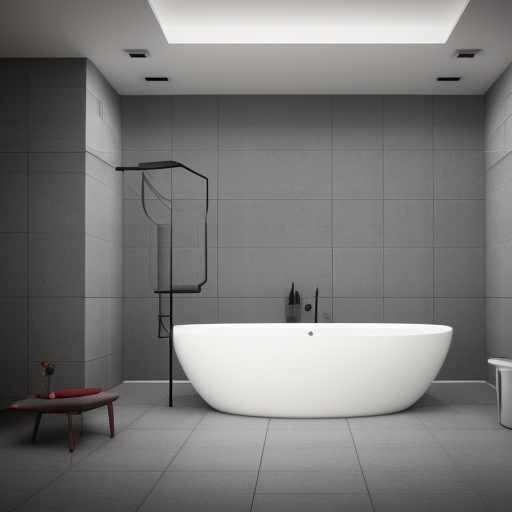